In [ ]:
#KMeans model by default

In [441]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

In [442]:
data = pd.read_csv(r"Bank_Personal_Loan.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [443]:
data.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,NaN,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,NaN,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,NaN,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000


In [444]:
data.drop(['ID','ZIP Code'], axis=1, inplace=True)

In [445]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data['CCAvg'] = le.fit_transform(data['CCAvg'])
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19,1,0,0,1,0,0,0
1,45,19,34,3,18,1,0,0,1,0,0,0
2,39,15,11,1,12,1,0,0,0,0,0,0
3,35,9,100,1,35,2,0,0,0,0,0,0
4,35,8,45,4,12,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,24,3,0,0,0,0,1,0
4996,30,4,15,4,4,1,85,0,0,0,1,0
4997,63,39,24,2,3,3,0,0,0,0,0,0
4998,65,40,49,3,5,2,0,0,0,0,1,0


In [446]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

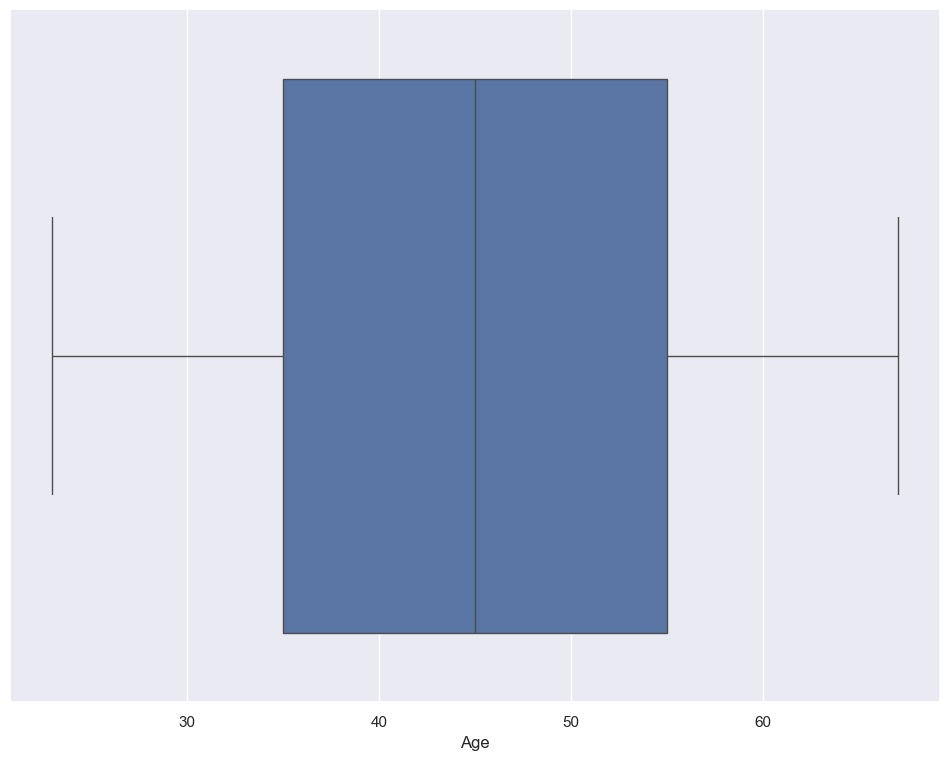

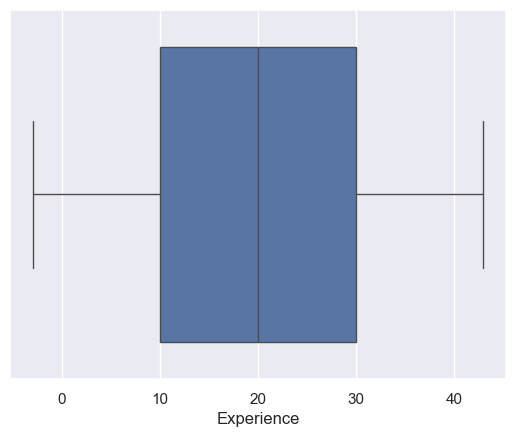

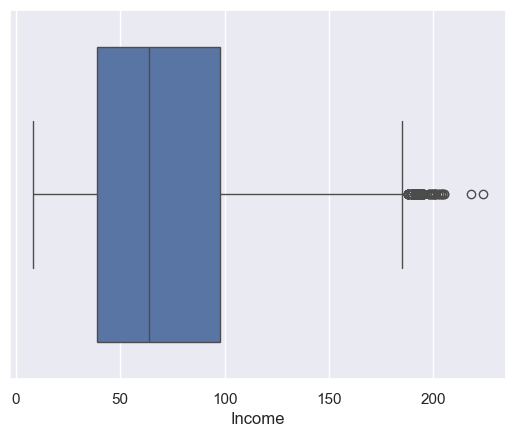

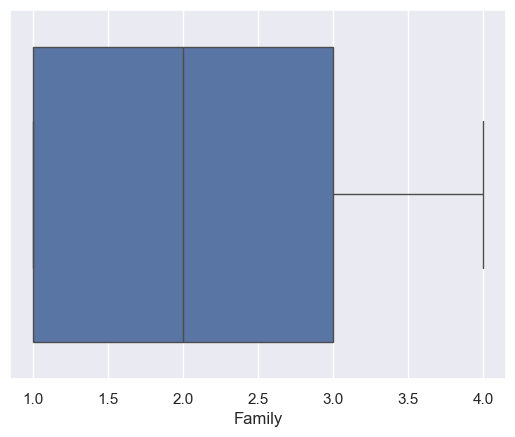

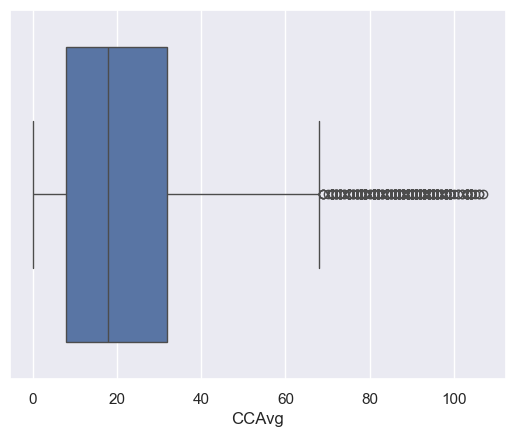

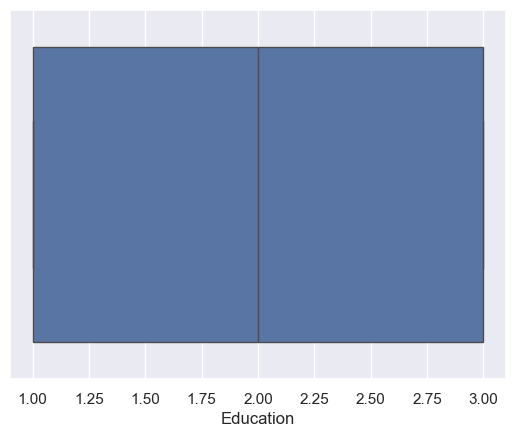

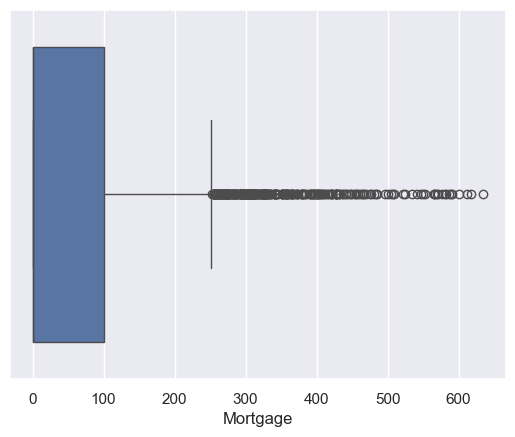

In [447]:
for i in data.columns:
    if data[i].dtypes!=object and data[i].nunique()>2:
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [448]:
q1=data.quantile(0.25, numeric_only=True)
q3=data.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

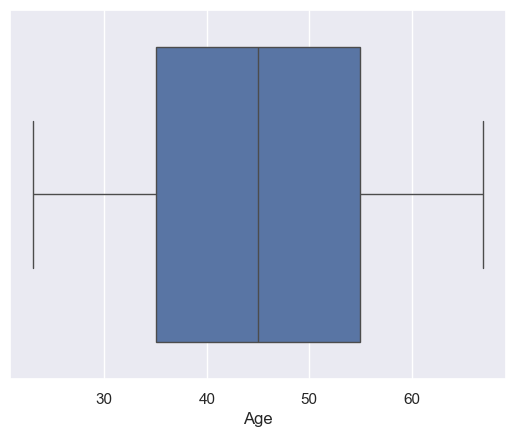

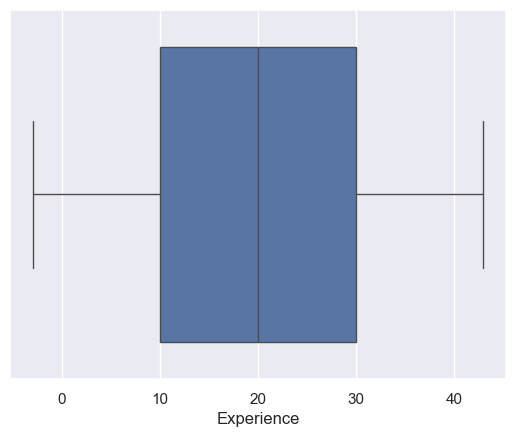

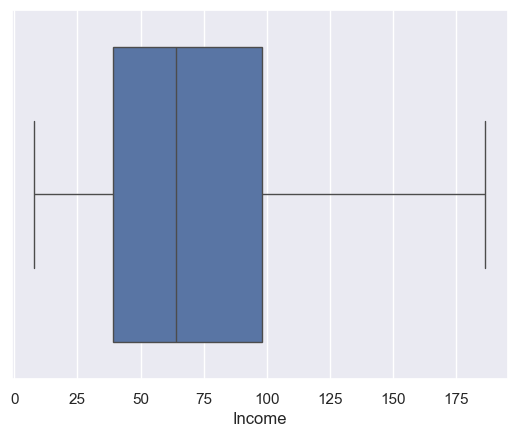

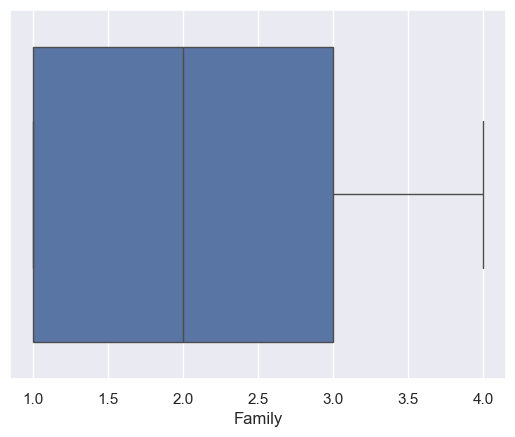

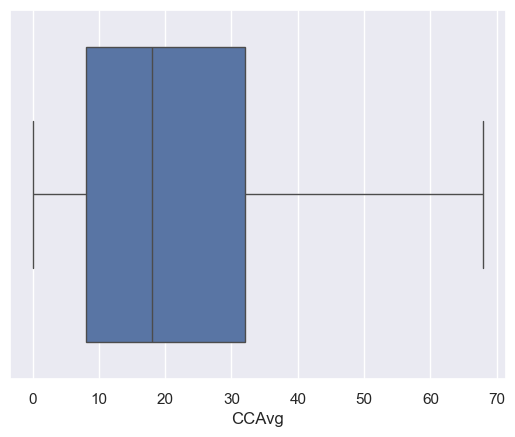

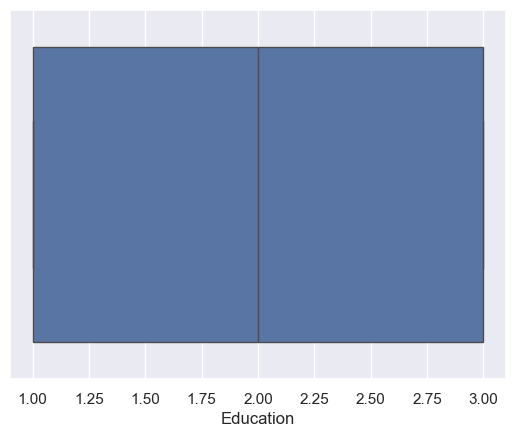

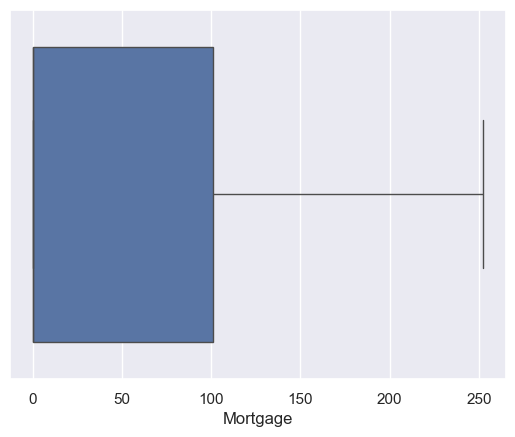

In [449]:
for i in data.columns:
    if data[i].dtypes!=object and  data[i].nunique()>2 :
        data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
        data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [450]:
plt.figure(figsize = (12, 9))
plt.scatter(data['Income'], data['CCAvg'])
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.title('Visualization of raw data')

Text(0.5, 1.0, 'Visualization of raw data')

In [451]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_std, columns=data.columns)
data_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.539600,1.397414,-0.216131,-1.049078,-0.608391,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.868392,0.525991,-0.267862,-1.049078,-0.608391,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.372540,-1.216855,-0.578247,-1.049078,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.578292,-1.216855,0.611562,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.627278,1.397414,-0.578247,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,1.549632


In [452]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)  
    kmeans.fit(data_scaled)
    
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
    print(f"Cluster {i}: WCSS = {wcss_iter:.4f}")  # Print WCSS first
    
    if i > 1:  # Calculate silhouette score only if k >= 2
        y = kmeans.predict(data_scaled)
        silhouette_avg = silhouette_score(data_scaled, y)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score = {silhouette_avg:.4f}")  
    else:
        print(" (Silhouette Score not applicable for k=1)")  


Cluster 1: WCSS = 60000.0000
 (Silhouette Score not applicable for k=1)
Cluster 2: WCSS = 52445.1587
Silhouette Score = 0.1319
Cluster 3: WCSS = 45646.7858
Silhouette Score = 0.1384
Cluster 4: WCSS = 40902.6156
Silhouette Score = 0.1552
Cluster 5: WCSS = 38828.1828
Silhouette Score = 0.1281
Cluster 6: WCSS = 37528.9845
Silhouette Score = 0.1148
Cluster 7: WCSS = 34639.3767
Silhouette Score = 0.1314


In [453]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


The optimal number of clusters (elbow point) is: 4


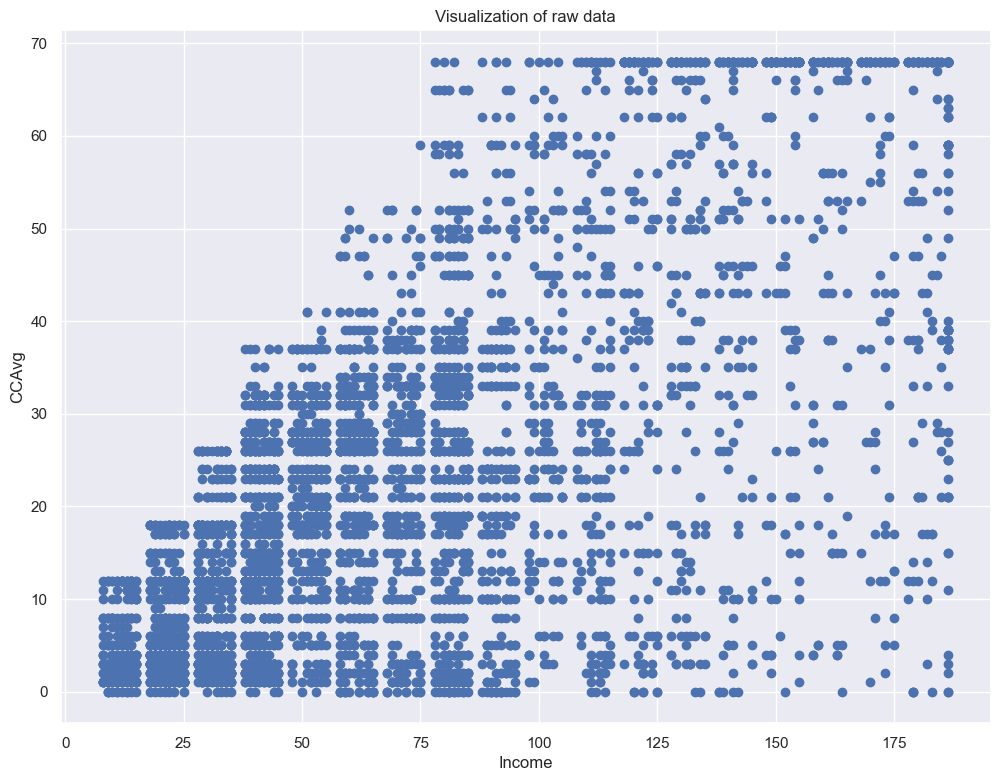

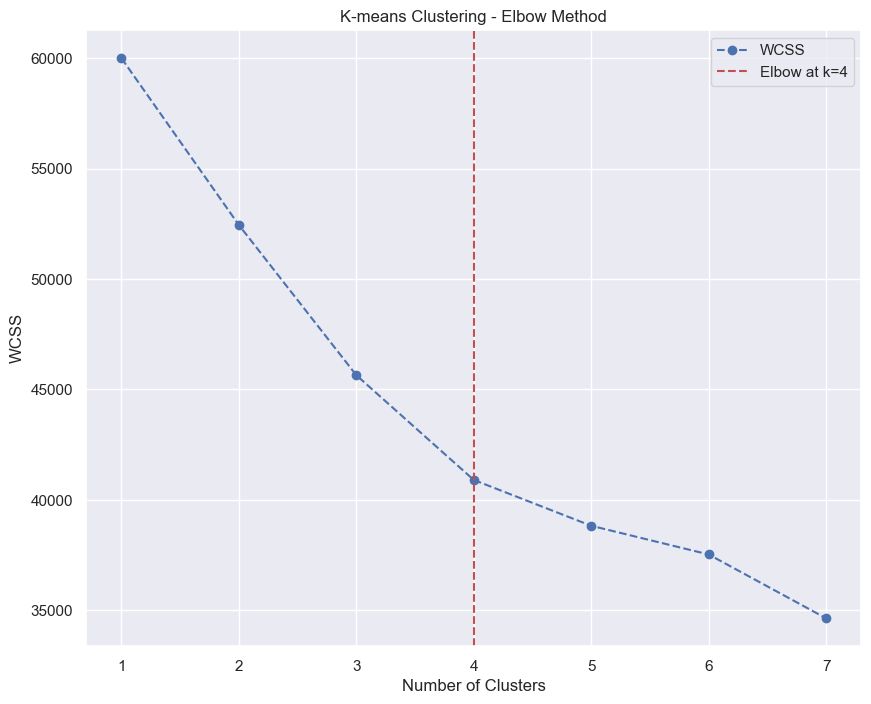

In [454]:
from kneed import KneeLocator

# Automatically find the "elbow"
knee_locator = KneeLocator(range(1, 8), wcss, curve="convex", direction="decreasing")

#Convex Curve: The plot is shaped like a gradually flattening downward curve.
#WCSS is always decreasing as we increase the number of clusters.

# Get the elbow point
optimal_k = knee_locator.elbow
print(f"The optimal number of clusters (elbow point) is: {optimal_k}")

# Plot with the elbow point marked
plt.figure(figsize=(10, 8))
plt.plot(range(1, 8), wcss, marker="o", linestyle="--", label="WCSS")
plt.axvline(optimal_k, linestyle="--", color="r", label=f"Elbow at k={optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering - Elbow Method")
plt.legend()
plt.show()


In [455]:
kmeans = KMeans(4)
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [456]:
data['Segment_KM'] = kmeans.predict(data_scaled)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segment_KM
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,2
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,2
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,2
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,2
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,1
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,2
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,2


In [457]:
df_segm_analysis = data.groupby(['Segment_KM'], as_index=False).mean()
df_segm_analysis

,Segment_KM,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,43.688327,18.691937,142.159446,1.960289,50.176895,1.534296,47.387485,0.399519,0.060168,0.0,0.530686,0.214200
1,1,43.155963,17.928644,64.966871,2.418960,18.290520,1.827727,170.185525,0.008155,0.076453,0.0,0.550459,0.249745
2,2,46.517325,21.202010,53.617117,2.507623,15.918572,1.994109,8.329522,0.000000,0.086625,0.0,0.595981,0.279626
3,3,45.701987,20.572848,104.241722,2.460265,34.135762,1.927152,73.190397,0.463576,0.486755,1.0,0.937086,0.794702


In [458]:
df_segm_analysis['data count'] = data[['Segment_KM','Age']].groupby(['Segment_KM']).count()
df_segm_analysis['data proportion'] = df_segm_analysis['data count'] / df_segm_analysis['data count'].sum()

df_segm_analysis

,Segment_KM,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,data count,data proportion
0,0,43.688327,18.691937,142.159446,1.960289,50.176895,1.534296,47.387485,0.399519,0.060168,0.0,0.530686,0.214200,831,0.1662
1,1,43.155963,17.928644,64.966871,2.418960,18.290520,1.827727,170.185525,0.008155,0.076453,0.0,0.550459,0.249745,981,0.1962
2,2,46.517325,21.202010,53.617117,2.507623,15.918572,1.994109,8.329522,0.000000,0.086625,0.0,0.595981,0.279626,2886,0.5772
3,3,45.701987,20.572848,104.241722,2.460265,34.135762,1.927152,73.190397,0.463576,0.486755,1.0,0.937086,0.794702,302,0.0604


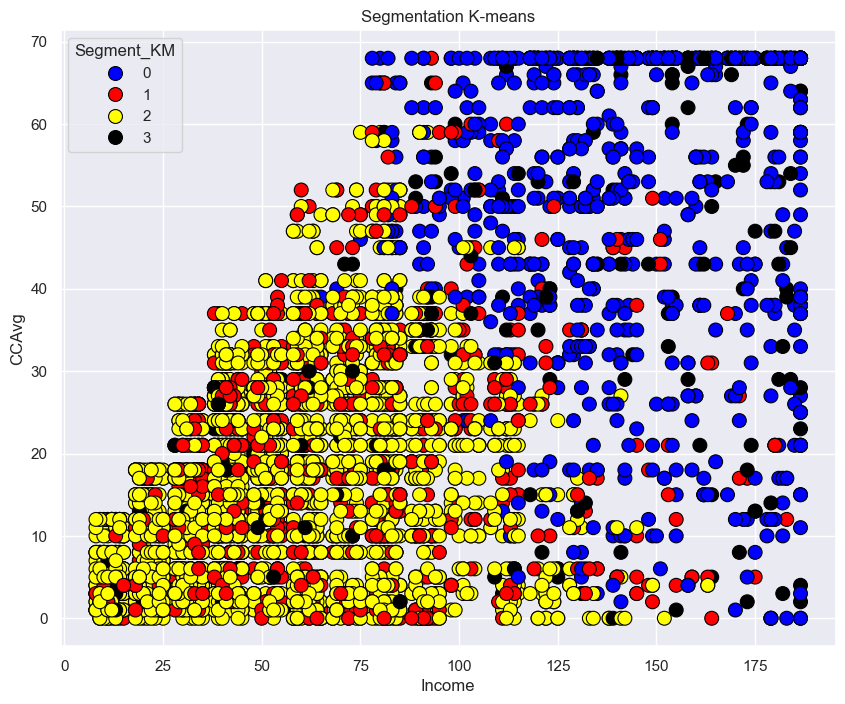

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.scatterplot(x=data['Income'], y=data['CCAvg'], hue=data['Segment_KM'], palette=['blue', 'red', 'yellow','black'], s=100, edgecolor="black")

plt.title('Segmentation K-means')
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend(title="Segment_KM")
plt.show()


In [460]:
# K Means model by PCA

In [461]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(data_scaled)

PCA()

In [462]:
pca.explained_variance_ratio_

array([0.18606888, 0.16503731, 0.117826  , 0.09538089, 0.08469593,
       0.08238101, 0.08126058, 0.07732457, 0.04771041, 0.0364458 ,
       0.02542292, 0.0004457 ])

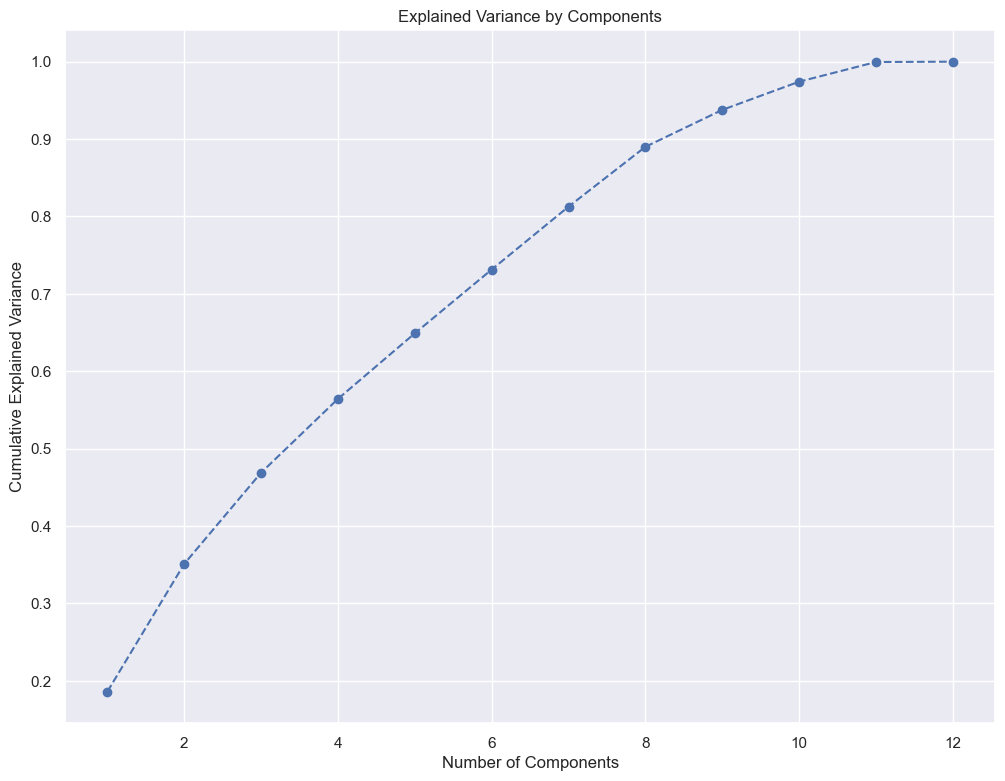

In [468]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 

# BEST PRACTICE around 80 % of the explained variance.
plt.figure(figsize=(12,9))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

plt.show()   


In [469]:
pca = PCA(n_components = 7)

In [470]:
pca.fit(data_scaled)

PCA(n_components=7)

In [471]:
pca.components_

array([[-0.2273779 , -0.22286441,  0.54673767, -0.07233208,  0.50265325,
        -0.10036616,  0.14517413,  0.45618376,  0.0912263 ,  0.2975517 ,
         0.04582872,  0.06003661],
       [ 0.66471144,  0.66596044,  0.15396376, -0.09076825,  0.13355696,
         0.00726127,  0.04290547,  0.17278583,  0.05390553,  0.15785418,
         0.04955092,  0.05335384],
       [-0.04668591, -0.053347  , -0.24616221,  0.27131023, -0.23576747,
         0.23494729, -0.0376214 ,  0.06876511,  0.44007213,  0.58157421,
         0.2541863 ,  0.38384397],
       [ 0.02271583,  0.00314041, -0.02294424,  0.43263214, -0.01325213,
         0.67991911,  0.07173465,  0.42853876, -0.20673121, -0.12927661,
        -0.20643625, -0.24177264],
       [-0.00695789, -0.00612747,  0.00562864, -0.02097635, -0.03196158,
         0.03369449,  0.13344922,  0.00879068, -0.60318755,  0.01836094,
        -0.17161405,  0.76535991],
       [-0.00589435, -0.00662418,  0.03096547,  0.09297205,  0.00845981,
         0.01898054, -

In [472]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segment_KM
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,2
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,2
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,2
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,2
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,1
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,2
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,2


In [473]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns[:-1].values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4', 'Component 5', 'Component 6', 'Component 7'])
df_pca_comp

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Component 1,-0.227378,-0.222864,0.546738,-0.072332,0.502653,-0.100366,0.145174,0.456184,0.091226,0.297552,0.045829,0.060037
Component 2,0.664711,0.665960,0.153964,-0.090768,0.133557,0.007261,0.042905,0.172786,0.053906,0.157854,0.049551,0.053354
Component 3,-0.046686,-0.053347,-0.246162,0.271310,-0.235767,0.234947,-0.037621,0.068765,0.440072,0.581574,0.254186,0.383844
Component 4,0.022716,0.003140,-0.022944,0.432632,-0.013252,0.679919,0.071735,0.428539,-0.206731,-0.129277,-0.206436,-0.241773
Component 5,-0.006958,-0.006127,0.005629,-0.020976,-0.031962,0.033694,0.133449,0.008791,-0.603188,0.018361,-0.171614,0.765360
Component 6,-0.005894,-0.006624,0.030965,0.092972,0.008460,0.018981,-0.131201,0.043382,-0.426552,-0.035954,0.880107,-0.113854
Component 7,0.008617,0.012361,-0.051030,0.143772,-0.136974,-0.141370,0.947866,-0.089811,0.009514,0.006176,0.125713,-0.123705


In [474]:
data_scaled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.539600,1.397414,-0.216131,-1.049078,-0.608391,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.868392,0.525991,-0.267862,-1.049078,-0.608391,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.372540,-1.216855,-0.578247,-1.049078,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.578292,-1.216855,0.611562,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.627278,1.397414,-0.578247,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,1.549632
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-1.491662,-0.736875,-1.216855,0.042523,1.332484,-0.608391,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4996,-1.338194,-1.404454,-1.284862,1.397414,-0.992093,-1.049078,0.415741,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4997,1.540880,1.647835,-1.087587,-0.345432,-1.043824,1.332484,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4998,1.715370,1.735043,-0.539600,0.525991,-0.940362,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,0.821951,-0.645314


In [475]:
scores_pca = pca.transform(data_scaled)

scores_pca

array([[ 0.23560059, -2.59468284,  1.07317467, ..., -2.17873849,
        -2.05885059, -0.22375048],
       [-0.65372434, -0.36787561,  0.764678  , ..., -2.18241582,
        -2.17117071, -0.29073315],
       [-1.06088646, -1.08530844, -0.90703031, ..., -0.16036738,
        -0.95107808, -0.51299951],
       ...,
       [-2.38373076,  1.62025279, -0.280849  , ..., -0.10931038,
        -0.84617817, -0.63124927],
       [-1.94132394,  1.90577199,  0.02189751, ..., -0.51953024,
         1.0226354 , -0.12090174],
       [ 0.28111309, -2.07298131,  0.65839364, ...,  1.15789667,
         0.81521936, -0.36417068]])

In [476]:
scores_pca.shape

(5000, 7)

In [477]:
pca_df = pd.DataFrame(scores_pca, columns=[f'Variable_{i+1}' for i in range(scores_pca.shape[1])])

pca_df


,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7
0,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750
1,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733
2,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000
3,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340
4,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592
...,...,...,...,...,...,...,...
4995,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327
4996,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462
4997,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249
4998,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902


In [480]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss_pca = []
silhouette_scores_pca = []

for i in range(1, 8):
    kmeans_pca = KMeans(n_clusters=i, random_state=42)  
    kmeans_pca.fit(pca_df)
    
    wcss_iter = kmeans_pca.inertia_
    wcss_pca.append(wcss_iter)
    
    print(f"Cluster {i}: WCSS = {wcss_iter:.4f}")  # Print WCSS first
    
    if i > 1:  # Calculate silhouette score only if k >= 2
        y = kmeans_pca.predict(pca_df)
        silhouette_avg = silhouette_score(pca_df, y)
        silhouette_scores_pca.append(silhouette_avg)
        print(f"Silhouette Score = {silhouette_avg:.4f}")  # Append silhouette score to output
    else:
        print(" (Silhouette Score not applicable for k=1)")  # Indicate skipping silhouette score


Cluster 1: WCSS = 48759.0355
 (Silhouette Score not applicable for k=1)
Cluster 2: WCSS = 40662.4805
Silhouette Score = 0.2694
Cluster 3: WCSS = 36713.6119
Silhouette Score = 0.1418
Cluster 4: WCSS = 32303.8823
Silhouette Score = 0.1506
Cluster 5: WCSS = 28388.8328
Silhouette Score = 0.1680
Cluster 6: WCSS = 27029.3823
Silhouette Score = 0.1621
Cluster 7: WCSS = 25512.3666
Silhouette Score = 0.1672


The optimal number of clusters (elbow point) is: 5


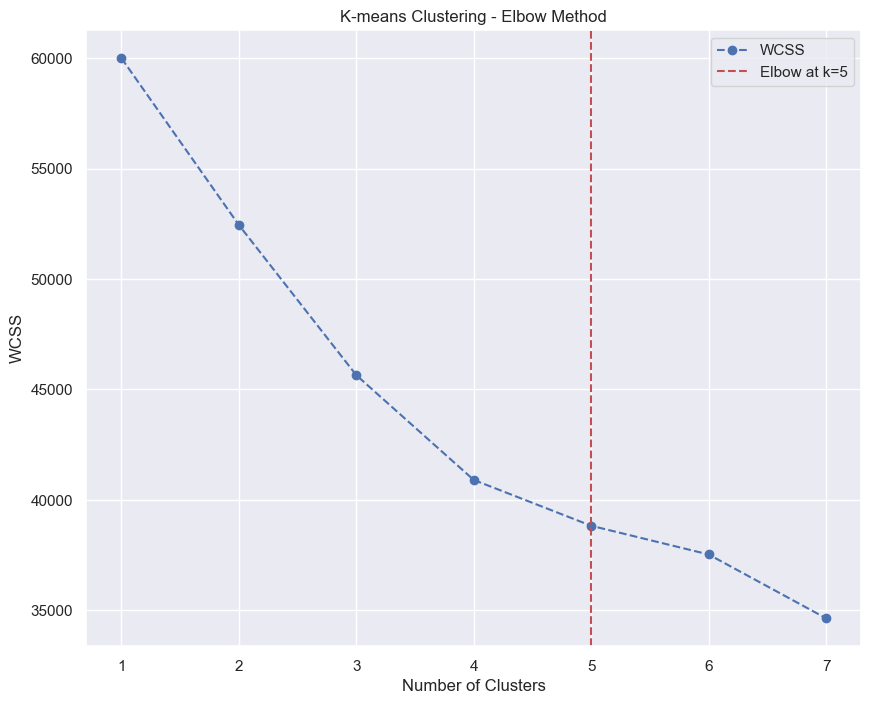

In [481]:
from kneed import KneeLocator

knee_locator = KneeLocator(range(1, 8), wcss_pca, curve="convex", direction="decreasing")

optimal_k = knee_locator.elbow
print(f"The optimal number of clusters (elbow point) is: {optimal_k}")

plt.figure(figsize=(10, 8))
plt.plot(range(1, 8), wcss, marker="o", linestyle="--", label="WCSS")
plt.axvline(optimal_k, linestyle="--", color="r", label=f"Elbow at k={optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering - Elbow Method")
plt.legend()
plt.show()


In [482]:
kmeans_pca = KMeans(5)
kmeans_pca.fit(pca_df)

KMeans(n_clusters=5)

In [483]:
data['Segment_KM_PCA'] = kmeans_pca.predict(pca_df)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segment_KM,Segment_KM_PCA
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,2,3
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,2,3
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,2,3
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0,3
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,2,2
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,1,2
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,2,1
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,2,1


In [484]:
data = pd.concat([data,pca_df], axis=1)

data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segment_KM,Segment_KM_PCA,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,2,3,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,2,3,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,2,3,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0,3,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,2,3,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,2,2,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,1,2,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,2,1,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,2,1,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902


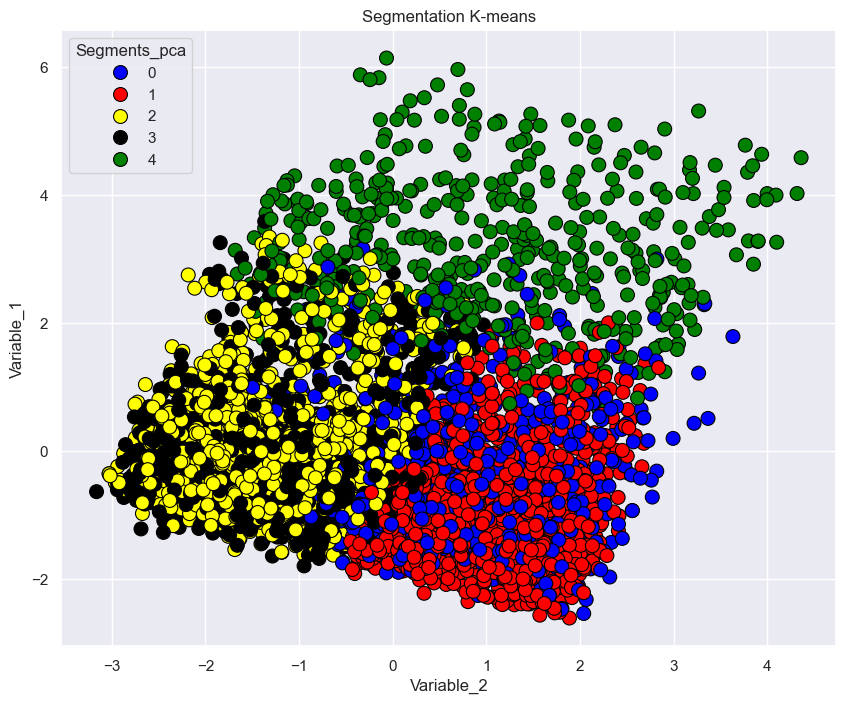

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.scatterplot(x=data['Variable_2'], y=data['Variable_1'], hue=data['Segment_KM_PCA'], palette=['blue', 'red', 'yellow', 'black','green'], s=100, edgecolor="black")

plt.title('Segmentation K-means')
plt.xlabel("Variable_2")
plt.ylabel("Variable_1")
plt.legend(title="Segments_pca")
plt.show()


In [486]:
df_segm_analysis = data.groupby(['Segment_KM_PCA'], as_index=False).mean()
df_segm_analysis

,Segment_KM_PCA,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segment_KM,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7
0,0,52.772277,27.481436,60.703589,2.365099,18.582921,1.873762,46.358911,0.000000,0.127475,0.172030,0.681931,0.990099,1.894802,-0.472148,0.896330,0.967481,-0.615896,1.091013,-0.099416,-0.123704
1,1,55.911885,30.611339,60.902664,2.335383,18.465164,1.918033,46.422473,0.002732,0.098361,0.000000,0.631148,0.000000,1.661202,-0.953786,1.024204,-0.375899,0.079666,-0.511195,0.119034,0.121817
2,2,35.007531,9.831799,70.485356,2.441841,22.051883,1.761506,47.119247,0.000837,0.087866,0.009205,1.000000,0.202510,1.497908,0.152665,-1.283091,0.060205,-0.324074,-0.266740,0.777991,0.135244
3,3,36.597858,11.413827,69.625122,2.378773,22.728335,1.831548,51.365141,0.002921,0.100292,0.000974,0.000000,0.260954,1.407984,0.011611,-1.185635,-0.425142,0.104998,0.163958,-1.058817,-0.109494
4,4,45.013834,19.826087,146.525692,2.551383,47.723320,2.167984,75.085968,0.932806,0.132411,0.298419,0.620553,0.316206,0.909091,3.129404,1.042037,0.263372,1.305234,0.034033,0.126025,-0.252082


In [487]:
df_segm_analysis['data count'] = data[['Segment_KM_PCA','Age']].groupby(['Segment_KM_PCA']).count()
df_segm_analysis['data proportion'] = df_segm_analysis['data count'] / df_segm_analysis['data count'].sum()

df_segm_analysis

,Segment_KM_PCA,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segment_KM,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,data count,data proportion
0,0,52.772277,27.481436,60.703589,2.365099,18.582921,1.873762,46.358911,0.000000,0.127475,0.172030,0.681931,0.990099,1.894802,-0.472148,0.896330,0.967481,-0.615896,1.091013,-0.099416,-0.123704,808,0.1616
1,1,55.911885,30.611339,60.902664,2.335383,18.465164,1.918033,46.422473,0.002732,0.098361,0.000000,0.631148,0.000000,1.661202,-0.953786,1.024204,-0.375899,0.079666,-0.511195,0.119034,0.121817,1464,0.2928
2,2,35.007531,9.831799,70.485356,2.441841,22.051883,1.761506,47.119247,0.000837,0.087866,0.009205,1.000000,0.202510,1.497908,0.152665,-1.283091,0.060205,-0.324074,-0.266740,0.777991,0.135244,1195,0.2390
3,3,36.597858,11.413827,69.625122,2.378773,22.728335,1.831548,51.365141,0.002921,0.100292,0.000974,0.000000,0.260954,1.407984,0.011611,-1.185635,-0.425142,0.104998,0.163958,-1.058817,-0.109494,1027,0.2054
4,4,45.013834,19.826087,146.525692,2.551383,47.723320,2.167984,75.085968,0.932806,0.132411,0.298419,0.620553,0.316206,0.909091,3.129404,1.042037,0.263372,1.305234,0.034033,0.126025,-0.252082,506,0.1012


In [488]:
df_pca_comp

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Component 1,-0.227378,-0.222864,0.546738,-0.072332,0.502653,-0.100366,0.145174,0.456184,0.091226,0.297552,0.045829,0.060037
Component 2,0.664711,0.665960,0.153964,-0.090768,0.133557,0.007261,0.042905,0.172786,0.053906,0.157854,0.049551,0.053354
Component 3,-0.046686,-0.053347,-0.246162,0.271310,-0.235767,0.234947,-0.037621,0.068765,0.440072,0.581574,0.254186,0.383844
Component 4,0.022716,0.003140,-0.022944,0.432632,-0.013252,0.679919,0.071735,0.428539,-0.206731,-0.129277,-0.206436,-0.241773
Component 5,-0.006958,-0.006127,0.005629,-0.020976,-0.031962,0.033694,0.133449,0.008791,-0.603188,0.018361,-0.171614,0.765360
Component 6,-0.005894,-0.006624,0.030965,0.092972,0.008460,0.018981,-0.131201,0.043382,-0.426552,-0.035954,0.880107,-0.113854
Component 7,0.008617,0.012361,-0.051030,0.143772,-0.136974,-0.141370,0.947866,-0.089811,0.009514,0.006176,0.125713,-0.123705


In [433]:
#AgglomerativeClustering model by default

In [ ]:
%matplotlib inline

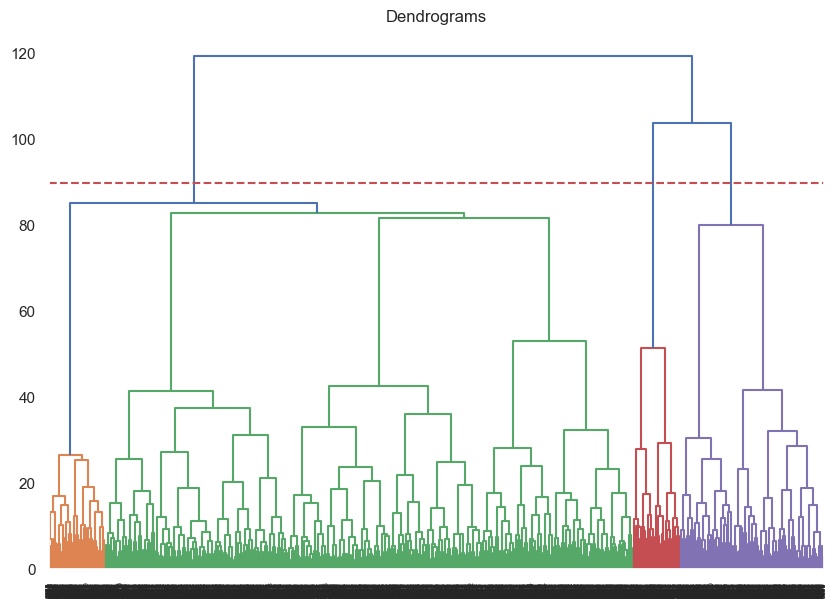

In [499]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  

_ = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=90, color='r', linestyle='--')

plt.show()


In [502]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
y = cluster.fit_predict(data_scaled)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [503]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segment_KM,Segment_KM_PCA,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,2,3,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,2,3,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,2,3,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0,3,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,2,3,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,2,2,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,1,2,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,2,1,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,2,1,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902


In [504]:
data['segment_HC'] = y

data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segment_KM,Segment_KM_PCA,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,segment_HC
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,2,3,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750,0
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,2,3,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733,0
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,2,3,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000,0
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0,3,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340,0
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,2,3,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,2,2,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327,0
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,1,2,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462,0
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,2,1,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249,0
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,2,1,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902,0


In [506]:
data['segment_HC'].value_counts() 

segment_HC
0    3774
1     924
2     302
Name: count, dtype: int64

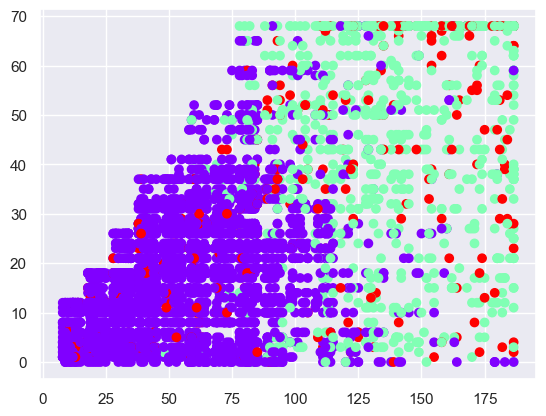

In [507]:

plt.scatter(data['Income'],data['CCAvg'],c=data['segment_HC'],cmap='rainbow')
plt.xlim()
plt.ylim()
plt.show()

In [508]:
# Segment_KM_PCA

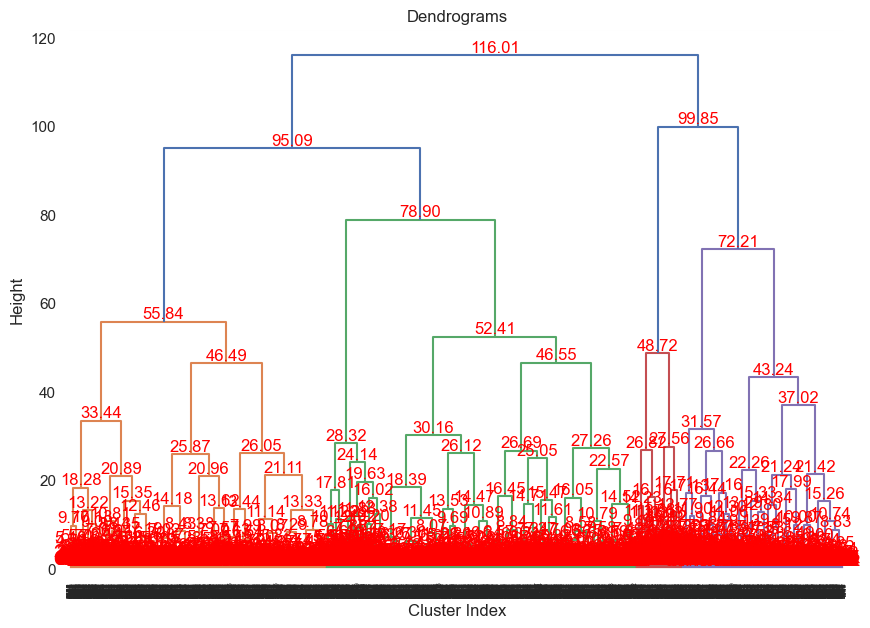

In [509]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))

# Label heights
for x, y in zip(dend['icoord'], dend['dcoord']):
    plt.text((x[1] + x[2]) / 2, y[1], f"{y[1]:.2f}", ha='center', va='bottom', color='red')

plt.xlabel("Cluster Index")
plt.ylabel("Height")
plt.show()



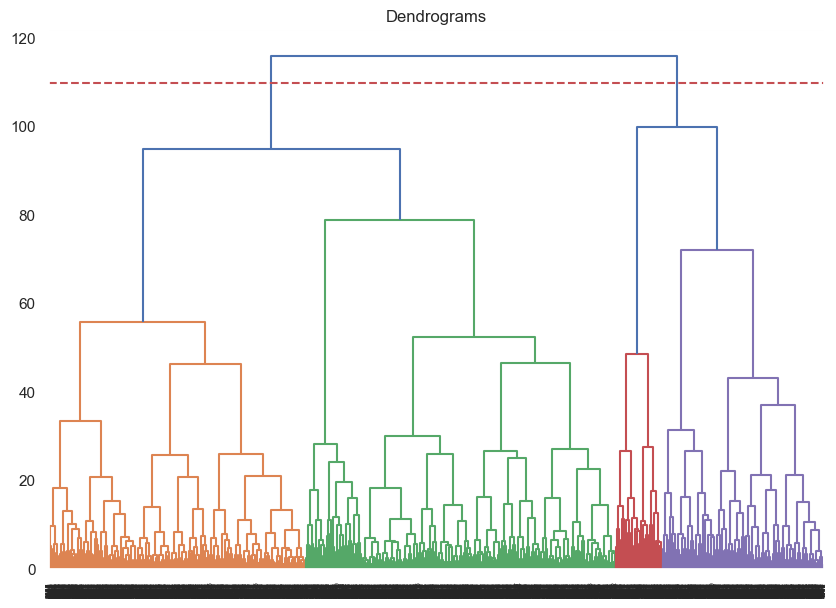

In [514]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))
plt.axhline(y=110, color='r', linestyle='--')
plt.show()

In [511]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  
y = cluster.fit_predict(pca_df)
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [512]:
 data['segment_HC_PCA'] = y



In [ ]:
data['segment_HC_PCA'].value_counts()

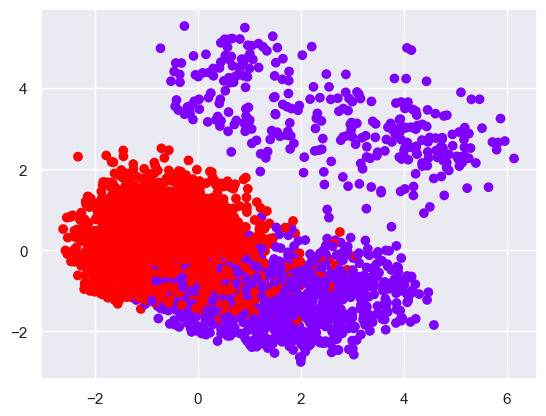

In [515]:

plt.scatter(data['Variable_1'],data['Variable_3'],c=data['segment_HC_PCA'],cmap='rainbow')
plt.xlim()
plt.ylim()
plt.show()